In [2]:
import numpy as np
import pandas as pd

In [3]:
txt = pd.read_csv('../data/cloud.txt','r')
txt

c:\Users\admin\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,선생님이 자꾸만 진도를 빠르게 나가신다.
0,난 아직 이해 못했는데 너무 빨리 나가셔서 필기도 다 하지 못하였다..
1,그냥 오늘 하루가 빨리 지나갔으면 좋겠다.
2,오늘 아침에 너무너무 피곤했다.
3,그런데 선생님께서 컴포즈커피를 사주셨다.
4,아이스티 샷 추가 마시면서 수업들으니까 행복하다.
...,...
77,앙증맞고 귀여웠다.
78,슈크림에서 약간 새콤한 맛이 나서 상한건가 조금 의심스러웠지만 뜨겁고 맛있었다. ...
79,늘 50분을 넘어서 쉬신다.
80,다음에는 꼭 50분에 쉬어주셨으면 좋겠다.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud

In [5]:
mask = np.array(Image.open('../data/cloud.png'))

In [6]:
f = open('../data/221014.txt','r', encoding='utf8')
txt = f.readlines()
f.close()

In [7]:
txt

['선생님\n',
 '자꾸만\n',
 '진도\n',
 '난\n',
 '이해\n',
 '필기\n',
 '그냥\n',
 '오늘\n',
 '하루\n',
 '오늘\n',
 '아침\n',
 '선생님\n',
 '컴\n',
 '포즈\n',
 '커피\n',
 '아이스티\n',
 '샷\n',
 '추가\n',
 '수업\n',
 '오늘\n',
 '수업\n',
 '마치\n',
 '꼭\n',
 '붕어빵\n',
 '집\n',
 '가기\n',
 '전\n',
 '화면\n',
 '우러러\n',
 '점\n',
 '오류\n',
 '구문\n',
 '오류\n',
 '나\n',
 '코딩\n',
 '마음\n',
 '모든\n',
 '통계\n',
 '분석\n',
 '사랑\n',
 '나\n',
 '데이터\n',
 '분석\n',
 '점심시간\n',
 '후\n',
 '오후\n',
 '가장\n',
 '노곤\n',
 '시간\n',
 '노곤\n',
 '선생님\n',
 '쉬는시간\n',
 '계속\n',
 '수업\n',
 '언제\n',
 '쉬는시간\n',
 '요\n',
 '프로젝트\n',
 '진도\n',
 '정신\n',
 '상태\n',
 '것\n',
 '시간\n',
 '오후\n',
 '렝\n',
 '스턴\n',
 '알렝\n',
 '짜증\n',
 '그\n',
 '벌써\n',
 '이\n',
 '모든\n',
 '것\n',
 '마음\n',
 '발목\n',
 '타고\n',
 '어스름\n',
 '새벽\n',
 '안개\n',
 '코\n',
 '끝\n',
 '메케\n',
 '공장\n',
 '매연\n',
 '모두\n',
 '마음\n',
 '그\n',
 '신경\n',
 '가장\n',
 '거\n',
 '스르\n',
 '것\n',
 '어젯밤\n',
 '온\n',
 '전화\n',
 '그\n',
 '사실\n',
 '이제\n',
 '나\n',
 '알\n',
 '것\n',
 '피카\n',
 '델리\n',
 '스트리트\n',
 '화재\n',
 '모든\n',
 '것\n',
 '줌\n',
 '과거\n',
 '재\n',
 '터\n',
 '그\n',
 '

In [8]:
# 줄바꾸기 지우기
new_txt = []
for i in txt:
    new_txt.append(i.replace('\n',''))

In [9]:
new_txt

['선생님',
 '자꾸만',
 '진도',
 '난',
 '이해',
 '필기',
 '그냥',
 '오늘',
 '하루',
 '오늘',
 '아침',
 '선생님',
 '컴',
 '포즈',
 '커피',
 '아이스티',
 '샷',
 '추가',
 '수업',
 '오늘',
 '수업',
 '마치',
 '꼭',
 '붕어빵',
 '집',
 '가기',
 '전',
 '화면',
 '우러러',
 '점',
 '오류',
 '구문',
 '오류',
 '나',
 '코딩',
 '마음',
 '모든',
 '통계',
 '분석',
 '사랑',
 '나',
 '데이터',
 '분석',
 '점심시간',
 '후',
 '오후',
 '가장',
 '노곤',
 '시간',
 '노곤',
 '선생님',
 '쉬는시간',
 '계속',
 '수업',
 '언제',
 '쉬는시간',
 '요',
 '프로젝트',
 '진도',
 '정신',
 '상태',
 '것',
 '시간',
 '오후',
 '렝',
 '스턴',
 '알렝',
 '짜증',
 '그',
 '벌써',
 '이',
 '모든',
 '것',
 '마음',
 '발목',
 '타고',
 '어스름',
 '새벽',
 '안개',
 '코',
 '끝',
 '메케',
 '공장',
 '매연',
 '모두',
 '마음',
 '그',
 '신경',
 '가장',
 '거',
 '스르',
 '것',
 '어젯밤',
 '온',
 '전화',
 '그',
 '사실',
 '이제',
 '나',
 '알',
 '것',
 '피카',
 '델리',
 '스트리트',
 '화재',
 '모든',
 '것',
 '줌',
 '과거',
 '재',
 '터',
 '그',
 '사건',
 '이',
 '당',
 '그',
 '그것',
 '이',
 '점점',
 '신경질',
 '식사',
 '때',
 '일',
 '때',
 '사람',
 '만날',
 '때',
 '누',
 '때',
 '모든',
 '것',
 '지금',
 '당장',
 '저',
 '문',
 '누군가',
 '불안감',
 '그',
 '지배',
 '불안감',
 '일시',
 '모두',
 '관심',
 '그',
 '점점',
 '기억',

In [10]:
str_txt = ''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [11]:
str_txt

'선생님 자꾸만 진도 난 이해 필기 그냥 오늘 하루 오늘 아침 선생님 컴 포즈 커피 아이스티 샷 추가 수업 오늘 수업 마치 꼭 붕어빵 집 가기 전 화면 우러러 점 오류 구문 오류 나 코딩 마음 모든 통계 분석 사랑 나 데이터 분석 점심시간 후 오후 가장 노곤 시간 노곤 선생님 쉬는시간 계속 수업 언제 쉬는시간 요 프로젝트 진도 정신 상태 것 시간 오후 렝 스턴 알렝 짜증 그 벌써 이 모든 것 마음 발목 타고 어스름 새벽 안개 코 끝 메케 공장 매연 모두 마음 그 신경 가장 거 스르 것 어젯밤 온 전화 그 사실 이제 나 알 것 피카 델리 스트리트 화재 모든 것 줌 과거 재 터 그 사건 이 당 그 그것 이 점점 신경질 식사 때 일 때 사람 만날 때 누 때 모든 것 지금 당장 저 문 누군가 불안감 그 지배 불안감 일시 모두 관심 그 점점 기억 조 래 최근 그것 과거 이야기 어잿밤 온 전화 쇠 듯 쉰 목소리 주인 그것 언급 순간 더 이상 그것 과거 불꽃 여기저기 비명 소리 소리 소리 캐 연기 다시금 그 발목 그 눈 거지 외마디 비명 소리 욕설 눈 그 앞 것 환상 듯 새벽 안개 보이지 마음 화재 연상 이 안개 캐 매연 전화 이제 그 더 이상 전화 주인 말 찬 새벽 공기 생각 굳이 그 이유 그것 과거 일이 설령 전화 주인 그것 미치광이 헛소리 마음 벤치 몸 그 때 호 수면 어 두운 새벽 더 그림자 그것 그 마지막 다음 이야기 신고 출동 듀크 경감 레이크 호수 의문 물체 시체 그 모습 마치 관 것 처럼 오리무중 사건 해결 위해 탐정 현장 도착 이 의문 물체 소금 금관 살인 사건 히터 계절 잠 더욱 내일 더욱 마음 맞이 모두 하루 차 반도 열매 차 반도 차 반도 모두 화이팅 저 다른사람 프레임 중상 모략 저 감자 저 줌 다른사람 명의 도용 물의 일이 반성 반성 저 양식 칼국수 거짓말 를 다시 한번 반성 치킨 화이트 어니언 맛 오늘 제목 야자 어머니 저 문과 왜 문법 확인 요 화이트 어니언 불도저 인내 어른 대응 스티커 그것 꽃 청춘 우리 어린시절 오늘 수업 복습 꼭 하자 다

In [12]:
from collections import Counter
Counter(new_txt).most_common()

[('그', 15),
 ('수업', 10),
 ('것', 10),
 ('그것', 8),
 ('선생님', 7),
 ('하루', 6),
 ('마음', 6),
 ('시간', 6),
 ('이', 6),
 ('때', 6),
 ('저', 6),
 ('오늘', 5),
 ('나', 5),
 ('모두', 5),
 ('전화', 5),
 ('모든', 4),
 ('새벽', 4),
 ('과거', 4),
 ('더', 4),
 ('소리', 4),
 ('생각', 4),
 ('내일', 4),
 ('날씨', 4),
 ('꼭', 3),
 ('쉬는시간', 3),
 ('안개', 3),
 ('이제', 3),
 ('사건', 3),
 ('당', 3),
 ('점점', 3),
 ('주인', 3),
 ('차', 3),
 ('반도', 3),
 ('반성', 3),
 ('날', 3),
 ('종일', 3),
 ('초콜릿', 3),
 ('수', 3),
 ('진도', 2),
 ('마치', 2),
 ('붕어빵', 2),
 ('집', 2),
 ('전', 2),
 ('점', 2),
 ('오류', 2),
 ('분석', 2),
 ('점심시간', 2),
 ('오후', 2),
 ('가장', 2),
 ('노곤', 2),
 ('언제', 2),
 ('요', 2),
 ('상태', 2),
 ('발목', 2),
 ('매연', 2),
 ('신경', 2),
 ('거', 2),
 ('온', 2),
 ('화재', 2),
 ('줌', 2),
 ('일', 2),
 ('사람', 2),
 ('불안감', 2),
 ('이야기', 2),
 ('듯', 2),
 ('이상', 2),
 ('비명', 2),
 ('캐', 2),
 ('눈', 2),
 ('말', 2),
 ('공기', 2),
 ('일이', 2),
 ('몸', 2),
 ('다음', 2),
 ('의문', 2),
 ('물체', 2),
 ('더욱', 2),
 ('화이팅', 2),
 ('다른사람', 2),
 ('화이트', 2),
 ('어니언', 2),
 ('맛', 2),
 ('우리', 2),
 ('복습', 2),
 

In [17]:
# stopwords = 워드클라우드에서 제외할 단어들의 집합

stop = [' ', '.', ',', '-', '을','를','와','의','는','에','으로','은','이','과','고',
       '로','입니다','가','그','그것','것']
stopwords = set(stop)

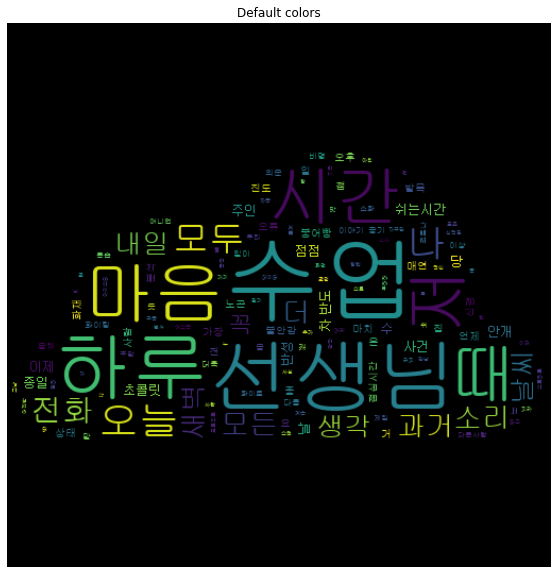

In [18]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/gulim.ttc',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1, contour_color = 'white').generate(str_txt)

wc.to_file("a_new_hope.png")
# plt.axis("off")
plt.figure(figsize = (10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [1]:
### 가장 많이 나온 28개 단어 stop에 추가
# for i in range(28):
#     stop.append(c[i][0])
    
### 여러개 추가 후 꼭 필요한 단어를 stop에서 제회
# for i in range(28):
#     stop.append(c[i][0])
# stop.remove('이건 꼭 있어야 돼')

In [40]:
f = open('./data/대파제육볶음.txt','r', encoding='utf8')
txt = f.readlines()
f.close()

In [2]:
# txt

In [42]:
# 줄바꾸기 지우기
new_txt = []
for i in txt:
    new_txt.append(i.replace("'",''))

In [3]:
# new_txt

In [4]:
# from collections import Counter
# Counter(new_txt).most_common()

In [33]:
str_txt = ''
for i in new_txt:
    str_txt = str_txt + i + ' '

In [5]:
# str_txt

In [6]:
# wc = WordCloud(font_path = 'C:/Windows/Fonts/gulim.ttc',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
#                random_state=1, contour_color = 'white').generate(str_txt)

# wc.to_file("a_new_hope.png")
# plt.axis("off")
# plt.figure(figsize = (10,10))
# plt.title("Default colors")
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [7]:
# def wordcloud(x):
#     f = open(x,'r', encoding='utf8')
#     txt = f.readlines()
#     f.close()
    
#     new_txt = []
#     for i in txt:
#         new_txt.append(i.replace('\n',''))
        
#     str_txt = ''
#     for i in new_txt:
#         str_txt = str_txt + i + ' '
        
#     wc = WordCloud(background_color = 'white',font_path = 'C:/Users/admin/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
#                random_state=1, contour_color = 'black').generate(str_txt)

#     wc.to_file("a_new_hope.png")
#     plt.axis("off")
#     plt.figure(figsize = (10,10))
#     plt.title("Default colors")
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     return plt.show()

In [8]:
# wordcloud('./data/morph_1.txt')